In [ ]:
from google.colab import files

# Paso 1: Subir los archivos desde la computadora
uploaded = files.upload()

Saving Iran Customer Churn.csv to Iran Customer Churn.csv


# **Método SMOTE**

   Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3    

<ipython-input-3-2fc36b570e50>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=iran, ax=axs[2, 1], palette='viridis')


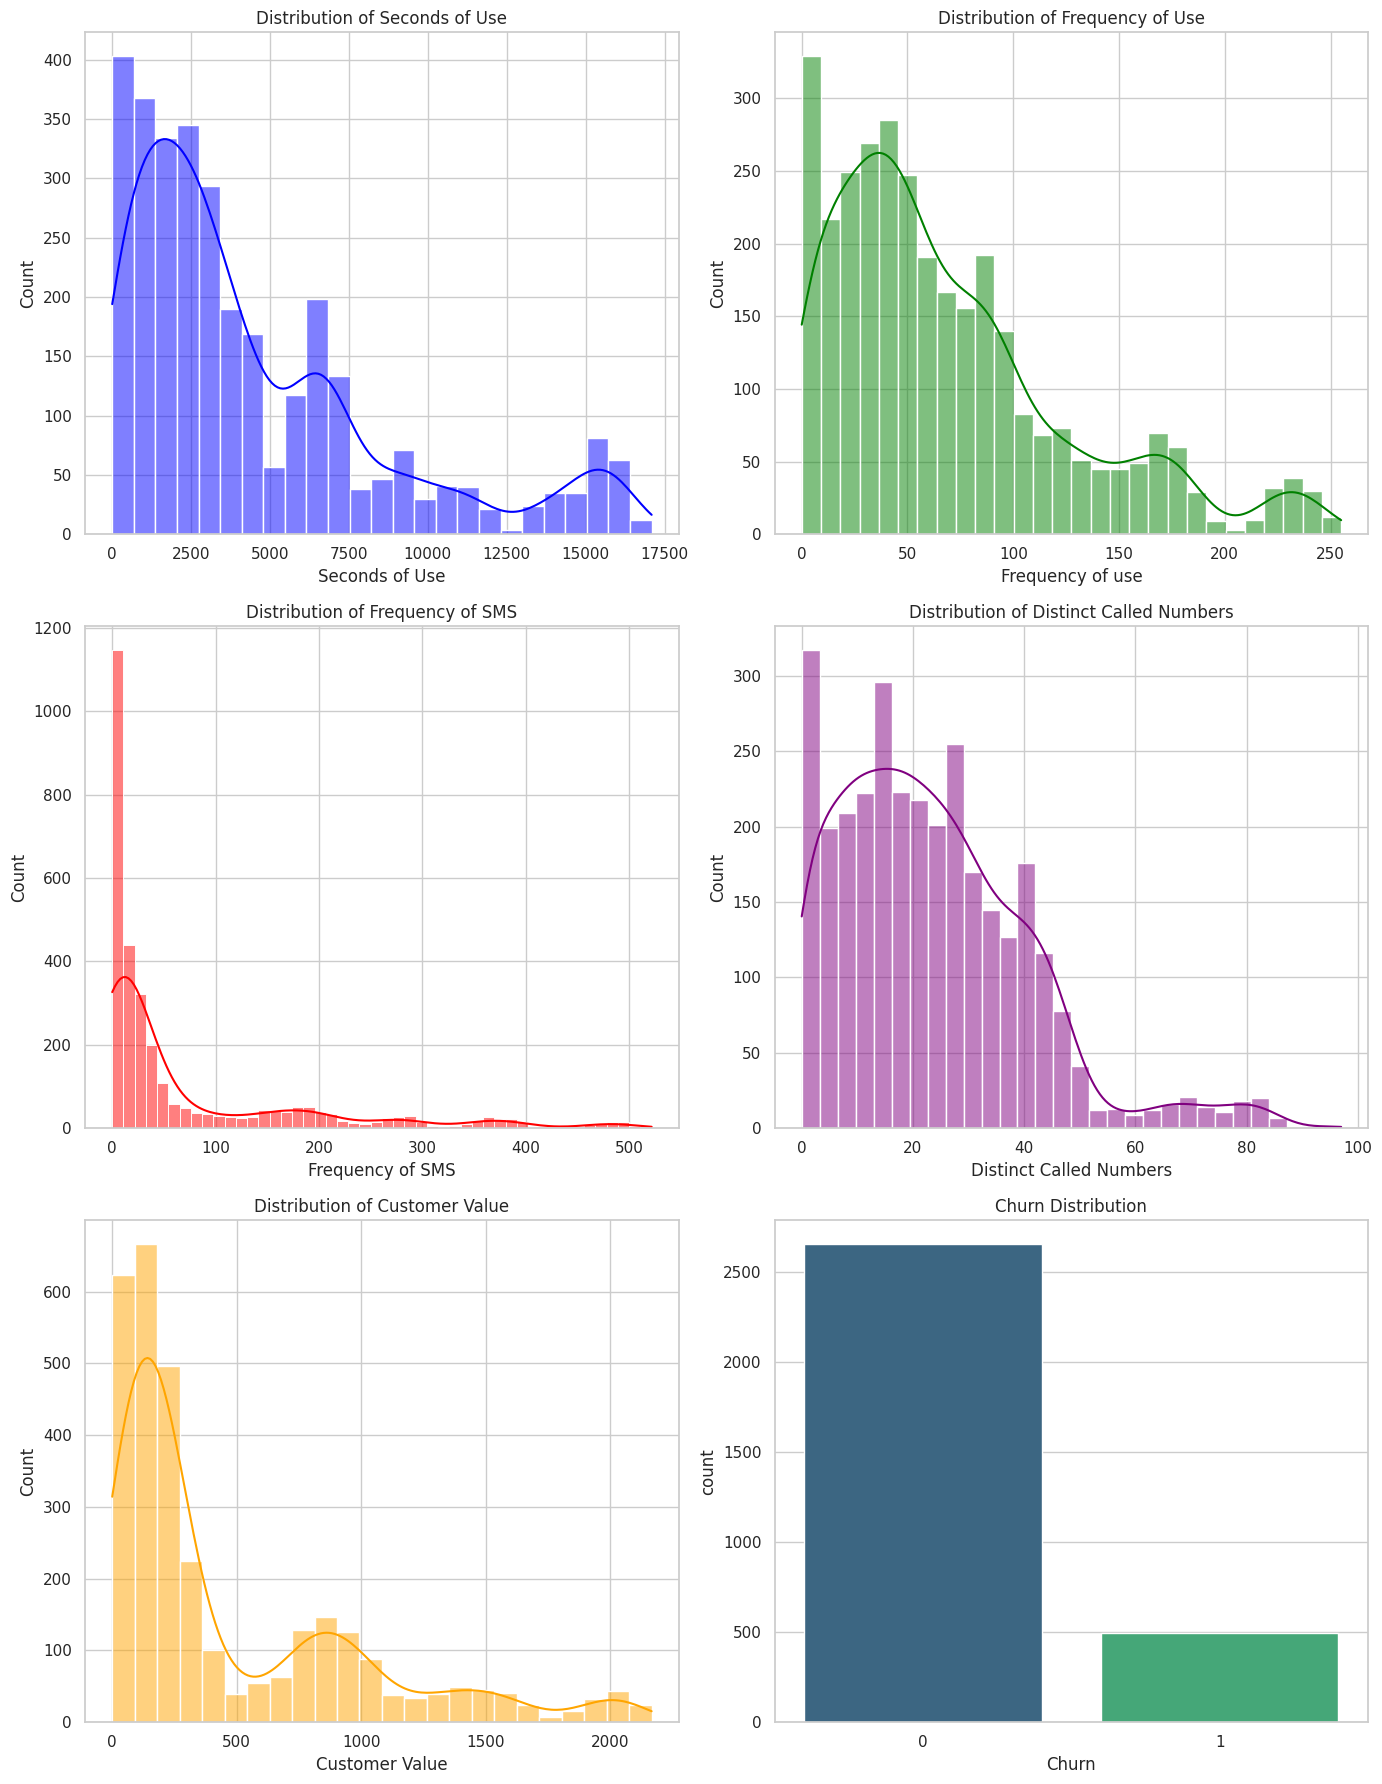

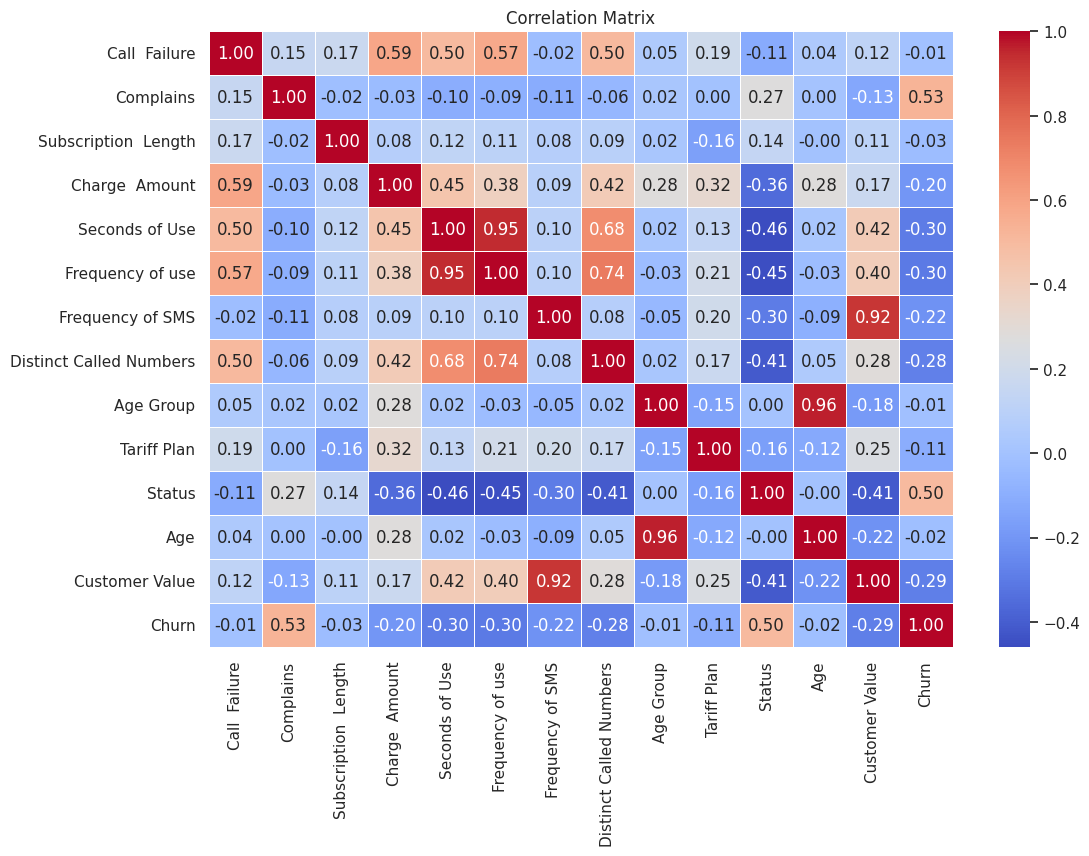

IV Resampleada:
{'Frequency of use': 5.1229682737032896, 'Seconds of Use': 5.025579572471387, 'Customer Value': 1.9614322736988004, 'Distinct Called Numbers': 1.1668815745893046, 'Frequency of SMS': 1.0651388380631053, 'Charge  Amount': 0.7084237412598271, 'Age Group': 0.2910349732585831, 'Subscription  Length': 0.2847894022476205, 'Age': 0.19714294310884, 'Call  Failure': 0.018773450563921563, 'Complains': 0.0, 'Tariff Plan': 0.0, 'Status': 0.0}
IV Original:
{'Frequency of use': 5.739815680873778, 'Seconds of Use': 5.648016392439335, 'Customer Value': 3.649703229128975, 'Frequency of SMS': 3.059552442216996, 'Distinct Called Numbers': 1.1019311926819986, 'Charge  Amount': 0.4679861989642257, 'Subscription  Length': 0.2669585820229001, 'Age Group': 0.17538115282357192, 'Age': 0.17538115282357192, 'Call  Failure': 0.027869861325735556, 'Complains': 0.0, 'Tariff Plan': 0.0, 'Status': 0.0}
[[364 168]
 [ 97 433]]
              precision    recall  f1-score   support

           0       0.7

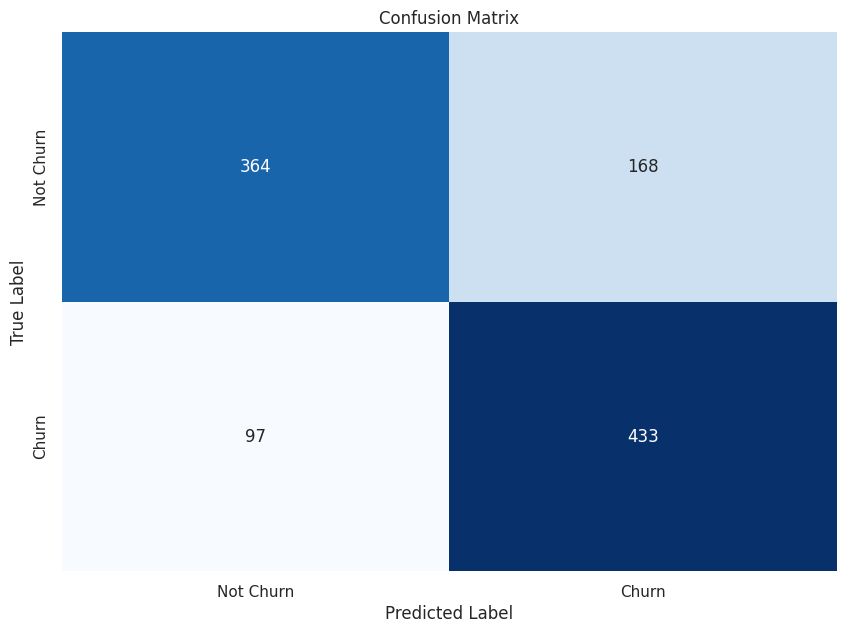

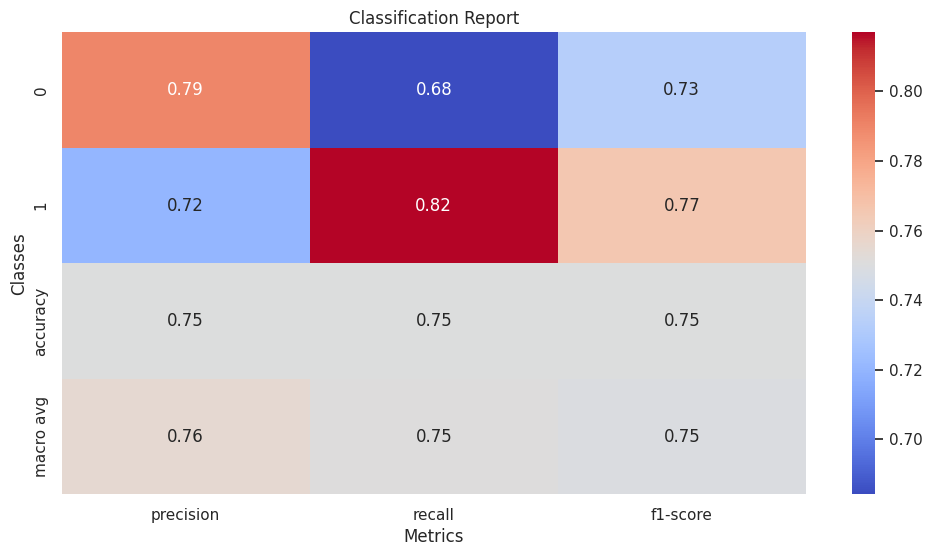

Confusion Matrix (Original Data):
[[518   2]
 [102   8]]

Classification Report (Original Data):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       520
           1       0.80      0.07      0.13       110

    accuracy                           0.83       630
   macro avg       0.82      0.53      0.52       630
weighted avg       0.83      0.83      0.77       630



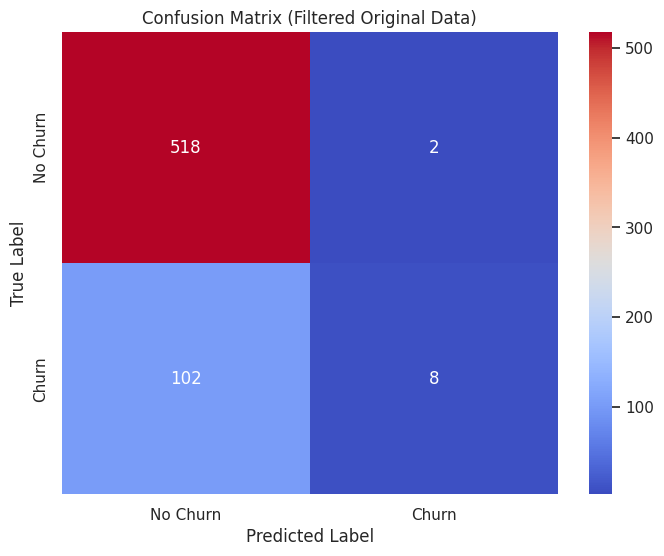

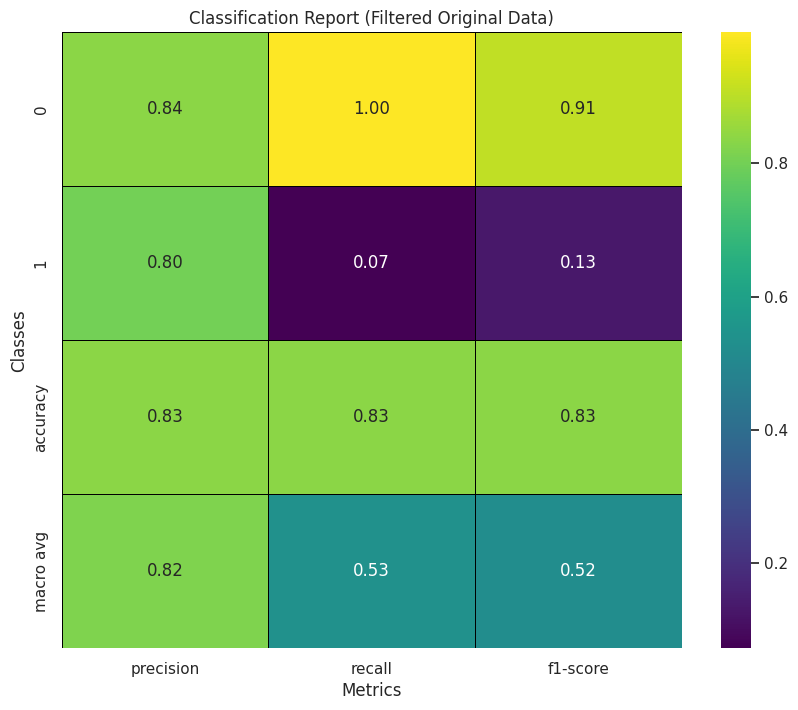

Evaluación del Modelo Random Forest
[[501  31]
 [ 13 517]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       532
           1       0.94      0.98      0.96       530

    accuracy                           0.96      1062
   macro avg       0.96      0.96      0.96      1062
weighted avg       0.96      0.96      0.96      1062



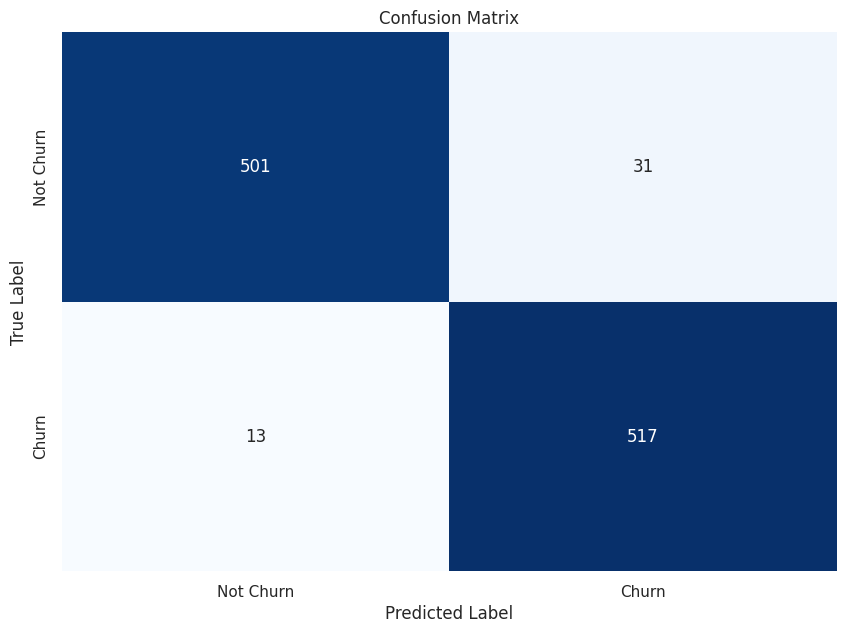

Mean Squared Error Logistic (Training Data): 0.2646
Mean Squared Error Logistic (Testing Data): 0.2495
Mean Squared Error Random Forest (Training Data): 0.0087
Mean Squared Error Random Forest (Testing Data): 0.0414
Diferencia en MSE (Logistic): 0.0151
Diferencia en MSE (Random Forest): -0.0327


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay

# Paso 1: Leer el contenido del dataset y ver las estadísticas principales
file_path = 'Iran Customer Churn.csv'
iran = pd.read_csv(file_path)
print(iran.head())

sumstats = iran.describe()
sumstats

# Elegimos el estilo para seaborn
sns.set(style="whitegrid")

# Figura 1: Distribución de los datos numéricos
fig, axs = plt.subplots(3, 2, figsize=(14, 18))

sns.histplot(iran['Seconds of Use'], kde=True, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Distribution of Seconds of Use')

sns.histplot(iran['Frequency of use'], kde=True, ax=axs[0, 1], color='green')
axs[0, 1].set_title('Distribution of Frequency of Use')

sns.histplot(iran['Frequency of SMS'], kde=True, ax=axs[1, 0], color='red')
axs[1, 0].set_title('Distribution of Frequency of SMS')

sns.histplot(iran['Distinct Called Numbers'], kde=True, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Distribution of Distinct Called Numbers')

sns.histplot(iran['Customer Value'], kde=True, ax=axs[2, 0], color='orange')
axs[2, 0].set_title('Distribution of Customer Value')

sns.countplot(x='Churn', data=iran, ax=axs[2, 1], palette='viridis')
axs[2, 1].set_title('Churn Distribution')

plt.tight_layout()
plt.show()

# Figura 2: Matriz de correlaciones
plt.figure(figsize=(12, 8))
corr_matrix = iran.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Datos originales sin remuestreo
X_original = iran.drop(columns=['Churn'])  # Variables predictoras
y_original = iran['Churn']  # Variable a predecir

# Balancear el Dataset usando SMOTE
X = iran.drop(columns=['Churn'])
y = iran['Churn']

# Usamos SMOTE para balancear el dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Concatenamos el dataset remuestreado con el original
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Churn'])], axis=1)


# Calcular los information values

def calculate_iv(data, feature, target, bins=10):
    # Nos aseguramos que los datos sean numericos y los que no van a NaN
    if not pd.api.types.is_numeric_dtype(data[feature]):
        data[feature] = pd.to_numeric(data[feature], errors='coerce')

    # Quitamos los valores faltantes (segun el txt no hace falta igual)
    data = data.dropna(subset=[feature])

    # Creamos bins para las variables predictoras
    feature_binned = pd.qcut(data[feature], q=bins, duplicates='drop')

    # Calculamos la cantidad de eventos y no eventos
    iv_table = pd.DataFrame({
        'Total': data.groupby(feature_binned, observed=False).size(),
        'Events': data.groupby(feature_binned, observed=False)[target].sum()
    })
    iv_table['Non-Events'] = iv_table['Total'] - iv_table['Events']

    # Calculamos la proporción relativa de eventos y no eventos dentro de cada bin sobre el total
    iv_table['Event_Rate'] = iv_table['Events'] / iv_table['Events'].sum()
    iv_table['Non_Event_Rate'] = iv_table['Non-Events'] / iv_table['Non-Events'].sum()

    # Calculamos WoE e IV
    iv_table['WoE'] = np.log((iv_table['Event_Rate'] + 1e-10) / (iv_table['Non_Event_Rate'] + 1e-10))
    iv_table['IV'] = (iv_table['Event_Rate'] - iv_table['Non_Event_Rate']) * iv_table['WoE']

    return iv_table['IV'].sum()


# Calculamos IV para cada variable predictora en el original y el remuestreado
iv_values_original = {col: calculate_iv(iran, col, 'Churn') for col in X.columns}
iv_values = {col: calculate_iv(df_resampled, col, 'Churn') for col in X.columns}

# Ordenamos IV de mayor a menor
iv_values_original_sorted = dict(sorted(iv_values_original.items(), key=lambda item: item[1], reverse=True))
iv_values_sorted = dict(sorted(iv_values.items(), key=lambda item: item[1], reverse=True))

# Imprimimos los resultados
print("IV Resampleada:")
print(iv_values_sorted)
print("IV Original:")
print(iv_values_original_sorted)

# Filtrar los valores bajos
threshold = 0.1
informative_features = [feature for feature, iv in iv_values.items() if iv > threshold]
informative_features_original = [feature for feature, iv in iv_values_original.items() if iv > threshold]

# Seleccionar los valores filtrados
X_filtered = df_resampled[informative_features]
# Nos aseguramos de que todos sean valores numericos
X_filtered = X_filtered.apply(pd.to_numeric, errors='coerce')

# Seleccionar la proporción de datos a entrenar y testear
X_train, X_test, y_train, y_test = train_test_split(X_filtered, df_resampled['Churn'], test_size=0.2, random_state=42)

# Entrenamos el modelo logístico
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Computamos la matriz de confusión para el modelo logístico
cm = confusion_matrix(y_test, y_pred)

# Graficamos la matriz
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Computamos el reporte de clasificación
report = classification_report(y_test, y_pred, output_dict=True)

# Convertimos el reporte de clasificación a un DataFrame
report_df = pd.DataFrame(report).transpose()
report_df_filtered = report_df.drop(columns='support')

# Graficamos el reporte de clasificación
plt.figure(figsize=(12, 6))
sns.heatmap(report_df_filtered.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

# Repetimos para los datos sin remuestreo
X_filtered_orig = X_original[informative_features_original]

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_filtered_orig, y_original, test_size=0.2, random_state=42)

# Entrenamos el modelo logístico original
model_orig = LogisticRegression(max_iter=1000)
model_orig.fit(X_train_orig, y_train_orig)

# Hacemos predicciones con los datos originales
y_pred_orig = model_orig.predict(X_test_orig)

# Evaluamos el modelo original
print("Confusion Matrix (Original Data):")
print(confusion_matrix(y_test_orig, y_pred_orig))
print("\nClassification Report (Original Data):")
print(classification_report(y_test_orig, y_pred_orig))


cm_orig = confusion_matrix(y_test_orig, y_pred_orig)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_orig, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix (Filtered Original Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

report_orig = classification_report(y_test_orig, y_pred_orig, output_dict=True)

report_df_orig = pd.DataFrame(report_orig).transpose()
report_df__orig_filtered = report_df_orig.drop(columns='support')

plt.figure(figsize=(10, 8))
sns.heatmap(report_df__orig_filtered.iloc[:-1, :], annot=True, cmap='viridis', fmt='.2f',
            linewidths=0.5, linecolor='black')
plt.title('Classification Report (Filtered Original Data)')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


# Implementación de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba con Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo Random Forest
print("Evaluación del Modelo Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Cálculo de errores cuadráticos medios
# Predicción sobre datos de prueba
y_pred_logreg_train = model.predict(X_train)
y_pred_rf_train = rf_model.predict(X_train)

mse_train_log = mean_squared_error(y_train, y_pred_logreg_train)
mse_test_log = mean_squared_error(y_test, y_pred)

mse_train_rf = mean_squared_error(y_train, y_pred_rf_train)
mse_test_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Squared Error Logistic (Training Data): {mse_train_log:.4f}")
print(f"Mean Squared Error Logistic (Testing Data): {mse_test_log:.4f}")
print(f"Mean Squared Error Random Forest (Training Data): {mse_train_rf:.4f}")
print(f"Mean Squared Error Random Forest (Testing Data): {mse_test_rf:.4f}")

# Comparación de ambos MSE
mse_log_dif = mse_train_log - mse_test_log
mse_rf_dif = mse_train_rf - mse_test_rf

print(f"Diferencia en MSE (Logistic): {mse_log_dif:.4f}")
print(f"Diferencia en MSE (Random Forest): {mse_rf_dif:.4f}")




# **Sin Balanceo**
Analizamos las variables para determinar cuales son clave para la toma de deciciones y entreamiento del modelo, a traves de la visualizacion e interpretacion de los graficos

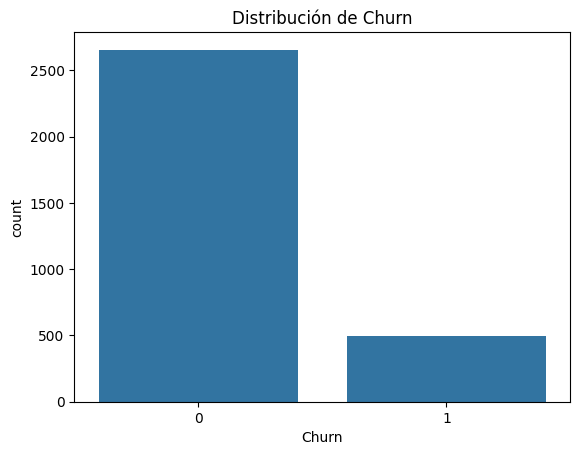

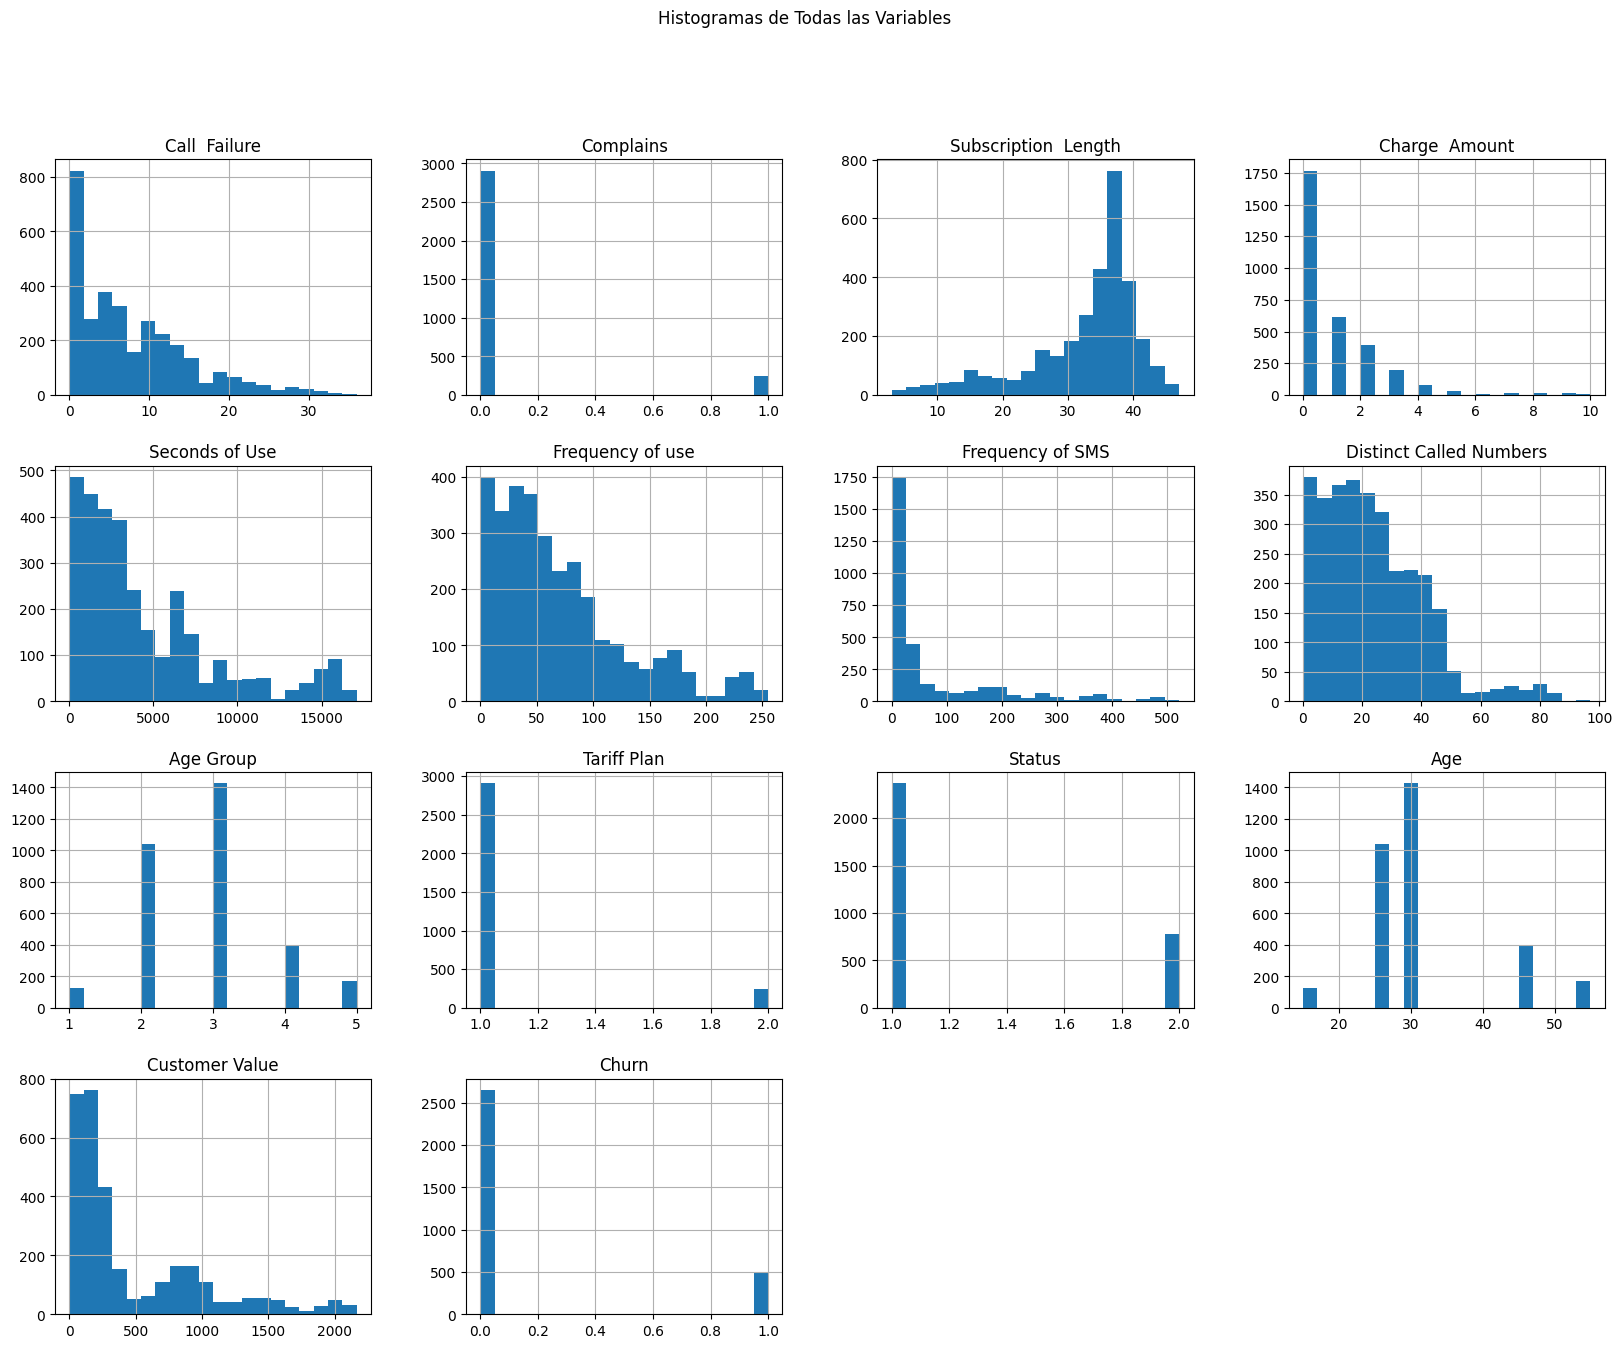

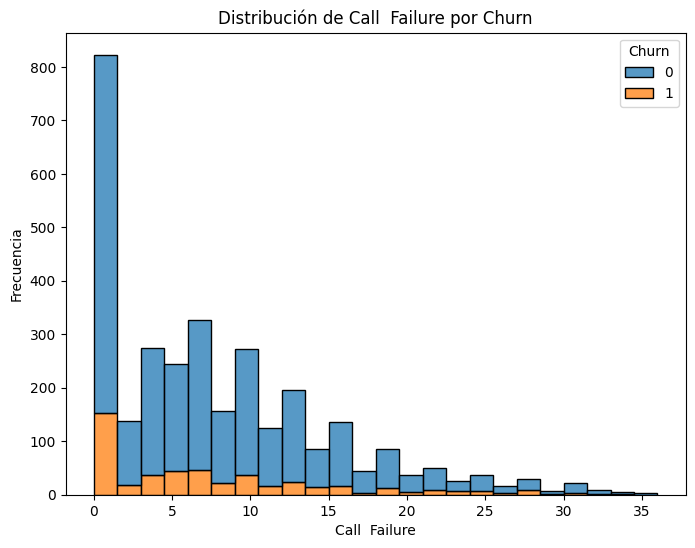

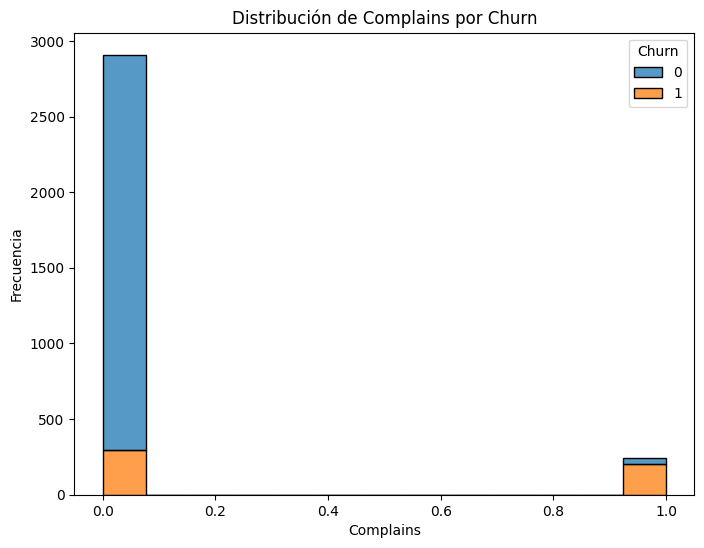

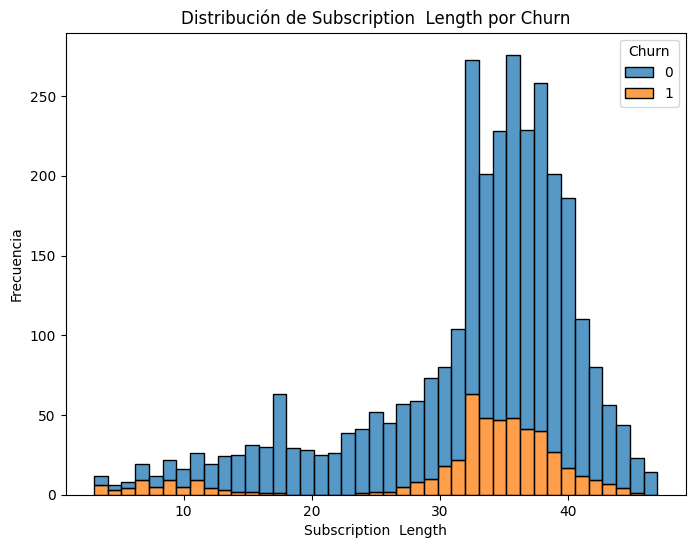

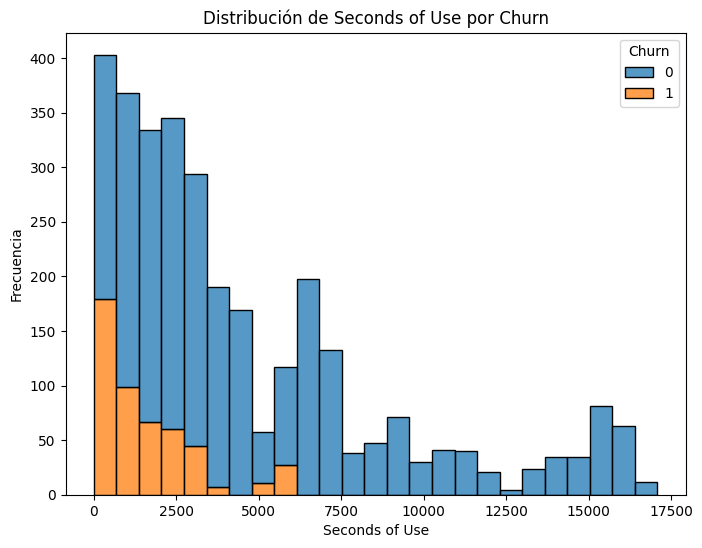

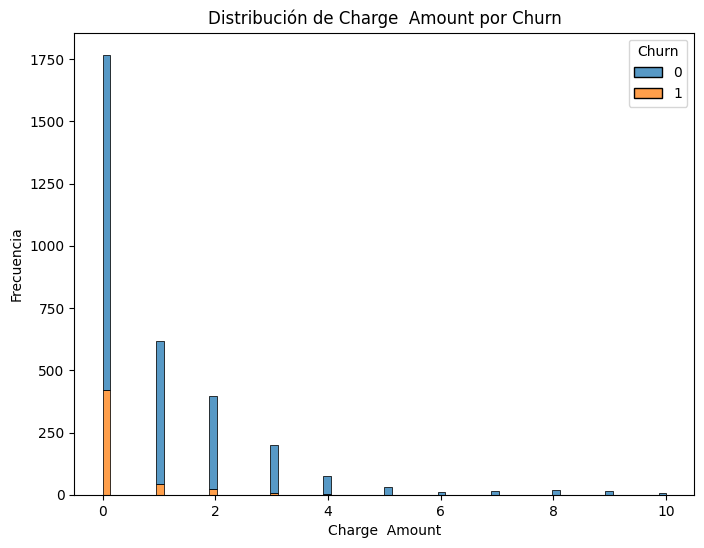

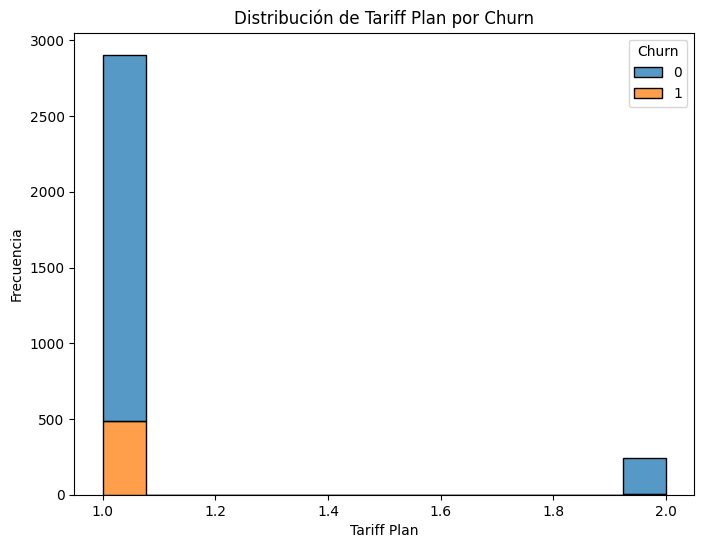

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('Iran Customer Churn.csv')


# Visualizar la distribución de la variable 'Churn'
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()


# histogramas de todas las variables numéricas para analizar su distribucion
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histogramas de Todas las Variables')
plt.show()

# Variables Seleccionadas para el Análisis
variables_interes = ['Call  Failure', 'Complains', 'Subscription  Length', 'Seconds of Use', 'Charge  Amount', 'Tariff Plan', 'Churn']

# Subset del DataFrame con las Variables Seleccionadas
df_interes = df[variables_interes]

# Visualización de las Variables Seleccionadas
for col in variables_interes[:-1]:  # Excluimos 'Churn' ya que es la variable objetivo
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_interes, x=col, hue='Churn', multiple='stack', kde=False)
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


# **Balanceado**
Realizamos un balanceo del dataset para asegurar un correcto entrenamiento y evaluación de los modelos de predicción, evitando sesgos y mejorando la precisión general en la detección de churn.

In [ ]:
pip install imbalanced-learn


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

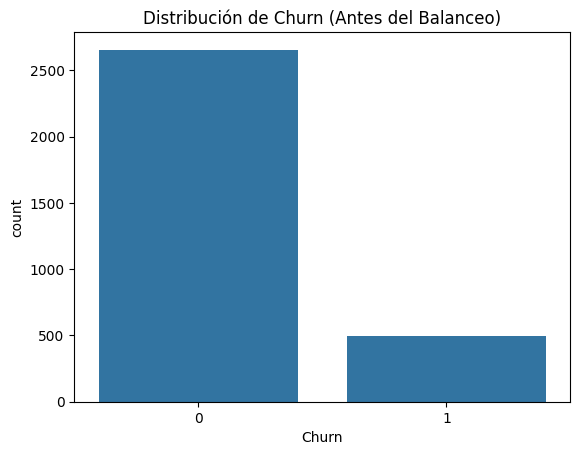

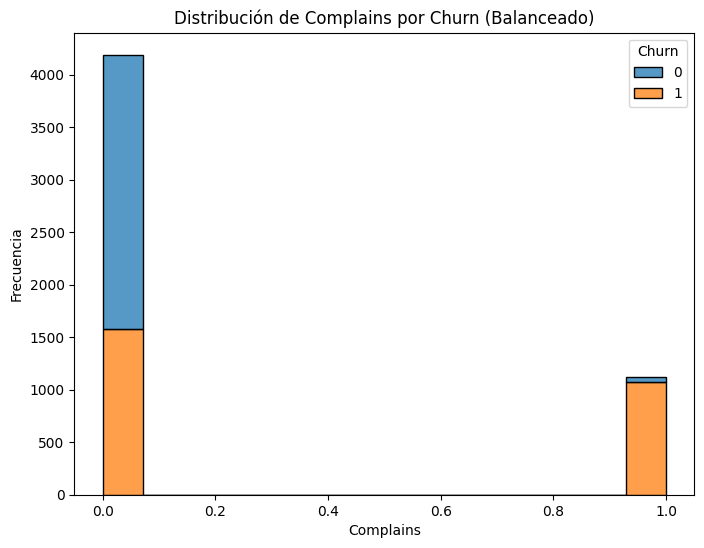

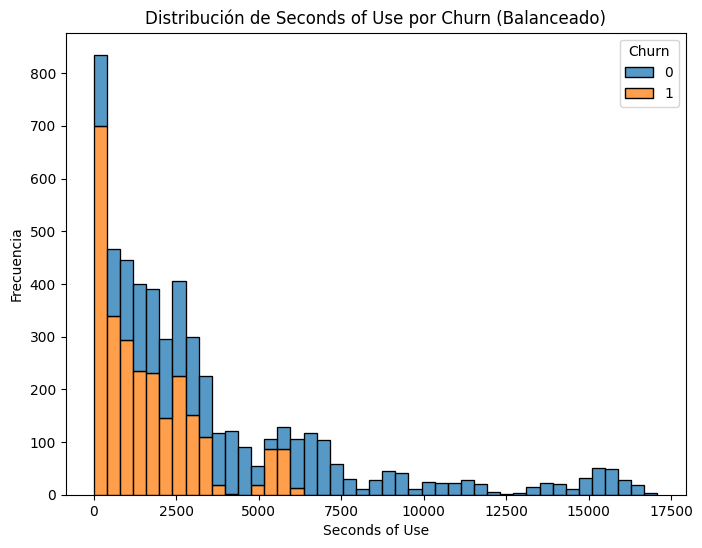

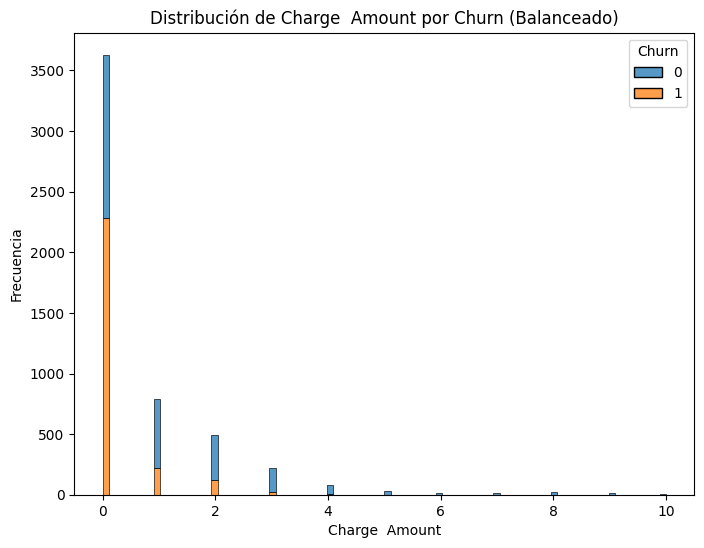

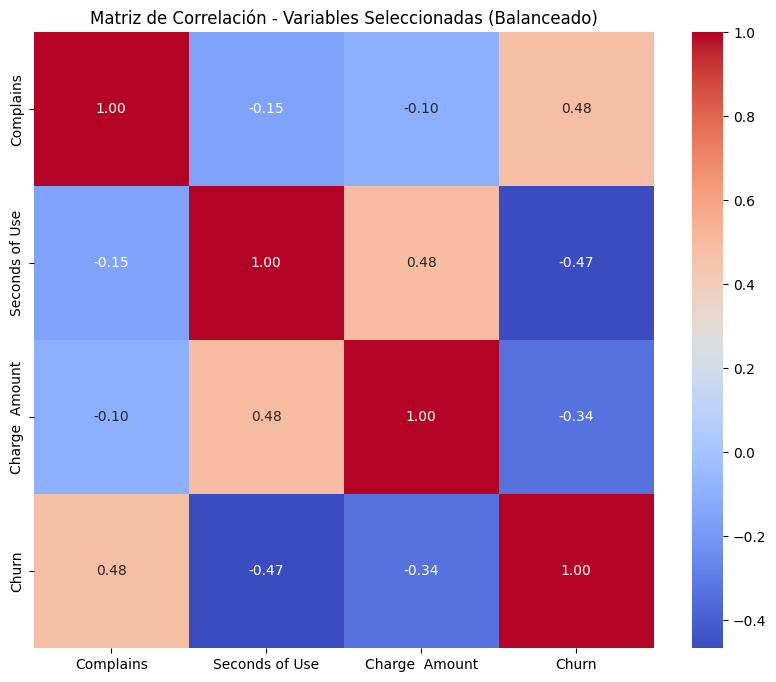

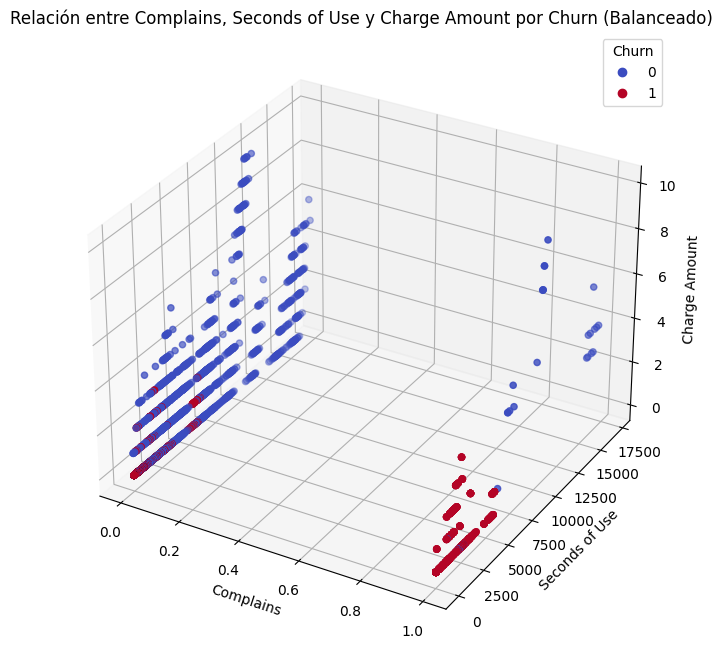

Evaluación del Modelo de Regresión Logística
[[618 178]
 [153 644]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       796
           1       0.78      0.81      0.80       797

    accuracy                           0.79      1593
   macro avg       0.79      0.79      0.79      1593
weighted avg       0.79      0.79      0.79      1593

Evaluación del Modelo Random Forest
[[701  95]
 [ 21 776]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       796
           1       0.89      0.97      0.93       797

    accuracy                           0.93      1593
   macro avg       0.93      0.93      0.93      1593
weighted avg       0.93      0.93      0.93      1593

Comparación de Modelos:
Evaluación del Modelo de Regresión Logística:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       796
           1       0.78      0.81      0

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('Iran Customer Churn.csv')

# Resumen rápido de la estructura del dataset
df.info()

# Descripción estadística de las variables numéricas
df.describe()

# Visualizar la distribución de la variable 'Churn' antes del balanceo
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn (Antes del Balanceo)')
plt.show()

# Aplicar Sobremuestreo (Oversampling) para Balancear el Dataset
ros = RandomOverSampler(random_state=42)
X = df[['Complains', 'Seconds of Use', 'Charge  Amount']]  # Variables específicas seleccionadas
y = df['Churn']  # Variable dependiente

X_resampled, y_resampled = ros.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados (sin escalar para visualización)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Churn'])], axis=1)

# Visualización de las Variables Seleccionadas antes de escalar
variables_interes = ['Complains', 'Seconds of Use', 'Charge  Amount', 'Churn']

for col in variables_interes[:-1]:  # Excluimos 'Churn' ya que es la variable objetivo
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_resampled, x=col, hue='Churn', multiple='stack', kde=False)
    plt.title(f'Distribución de {col} por Churn (Balanceado)')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Matriz de Correlación para las Variables Seleccionadas
plt.figure(figsize=(10, 8))
correlation_matrix = df_resampled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Variables Seleccionadas (Balanceado)')
plt.show()

# Gráfico 3D después del balanceo pero antes del escalado
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df_resampled['Complains'],  # Complains
    df_resampled['Seconds of Use'],  # Seconds of Use
    df_resampled['Charge  Amount'],  # Charge Amount
    c=df_resampled['Churn'], cmap='coolwarm'
)
ax.set_xlabel('Complains')
ax.set_ylabel('Seconds of Use')
ax.set_zlabel('Charge Amount')
ax.set_title('Relación entre Complains, Seconds of Use y Charge Amount por Churn (Balanceado)')
ax.legend(*scatter.legend_elements(), title="Churn")
plt.show()

# Escalar los datos antes de entrenar los modelos
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled_scaled, y_resampled, test_size=0.3, random_state=42)

# Implementación de la Regresión Logística con más iteraciones
logreg_model = LogisticRegression(max_iter=500, random_state=42)
logreg_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba con Regresión Logística
y_pred_logreg = logreg_model.predict(X_test)

# Evaluación del modelo de Regresión Logística
print("Evaluación del Modelo de Regresión Logística")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Implementación de Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba con Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo Random Forest
print("Evaluación del Modelo Random Forest")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Comparación de Modelos
print("Comparación de Modelos:")
print("Evaluación del Modelo de Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))
print("Evaluación del Modelo Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Cálculo de errores cuadráticos medios
mse_train_log = mean_squared_error(y_train, logreg_model.predict(X_train))
mse_test_log = mean_squared_error(y_test, y_pred_logreg)

mse_train_rf = mean_squared_error(y_train, rf_model.predict(X_train))
mse_test_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Squared Error Logistic (Training Data): {mse_train_log:.4f}")
print(f"Mean Squared Error Logistic (Testing Data): {mse_test_log:.4f}")

print(f"Mean Squared Error Random Forest (Training Data): {mse_train_rf:.4f}")
print(f"Mean Squared Error Random Forest (Testing Data): {mse_test_rf:.4f}")

mse_log_dif = mse_train_log - mse_test_log
mse_rf_dif = mse_train_rf - mse_test_rf

print(f"Diferencia en MSE (Logistic): {mse_log_dif:.4f}")
print(f"Diferencia en MSE (Random Forest): {mse_rf_dif:.4f}")
